<a href="https://colab.research.google.com/github/neogeolee/Deeplearning/blob/master/tf11_auto_encoder_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/25
이름 : 이태훈
내용 : 딥러닝 오토인코더 MNIST 실습하기
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape
x_train[0]
y_train[0]

5

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
x_train.shape

(60000, 784)

In [ ]:
# Encoder 모델구성
encoder_inputs = Input(shape=(784,))
encoder_hidden = Dense(32, activation='relu')(encoder_inputs)
encoder_outputs = Dense(2)(encoder_hidden)

encoder_model = Model(encoder_inputs, encoder_outputs)
encoder_model.summary()

Model: "functional_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Decoder 모델구성
decoder_inputs = Dense(2)(encoder_outputs)
decoder_hidden = Dense(32, activation='relu')(decoder_inputs)
decoder_outputs = Dense(784)(decoder_hidden)

# decoder_model = Model(decoder_inputs, decoder_outputs)
# decoder_model.summary()

In [ ]:
# 인코더, 디코더 모델 구성
auto_encoder = Model(encoder_inputs, decoder_outputs)
auto_encoder.summary()

Model: "functional_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_13 (Dense)             (None, 784)               25872     
Total params: 51,160
Trainable params: 51,160
Non-trainable params: 0
_________________________________________________

In [ ]:
# 모델 설정/학습하기
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(x_train,
                 x_train,
                 epochs=10,
                 batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0622
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0545
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0532
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0519
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0511
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0503
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0496
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0490
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0486
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0483


In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[ 1.2866338e-03,  1.9367784e-04,  6.5835193e-05, ...,
        -5.0438568e-04,  2.2372256e-03,  9.8335836e-04],
       [ 1.5261015e-03,  6.5055722e-04, -1.4252421e-03, ...,
        -3.2584746e-03, -2.5821072e-03,  4.7035255e-03],
       [ 3.1572569e-03,  1.9214791e-03, -3.4175850e-03, ...,
        -2.2383553e-03, -1.5527653e-03,  3.7968983e-03],
       ...,
       [ 5.8497675e-03, -2.0133508e-03,  2.7648360e-04, ...,
        -1.1418068e-03,  7.4117072e-04,  5.3605470e-03],
       [-3.2489365e-03,  1.6167914e-03,  3.5004690e-05, ...,
        -1.8106354e-04,  1.4508935e-04, -1.0051150e-03],
       [ 2.9311236e-04, -1.1664350e-05,  4.9041025e-04, ...,
         1.4375295e-03,  1.4288505e-03,  2.6672427e-04]], dtype=float32)

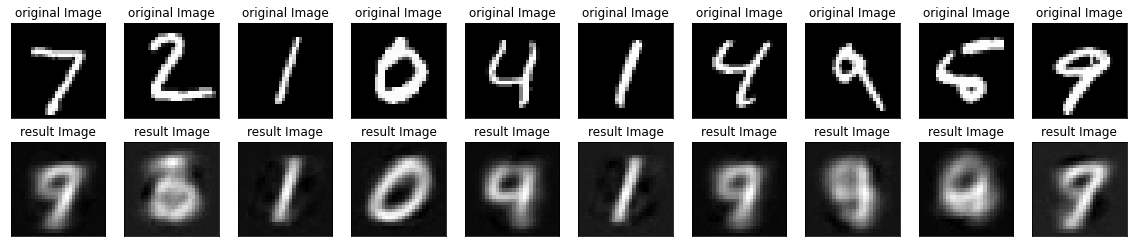

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))
for i in range(10):
  # original Image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result Image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
# 인코더 모델로 결과출력
encoder_pre_result = encoder_model.predict(x_test)
encoder_pre_result

array([[-0.31709915,  4.987244  ],
       [ 0.6518089 ,  2.0637019 ],
       [-5.431958  , -3.0114803 ],
       ...,
       [-0.8193405 ,  7.132575  ],
       [-0.9959714 ,  3.697462  ],
       [ 1.9518406 ,  7.4181476 ]], dtype=float32)

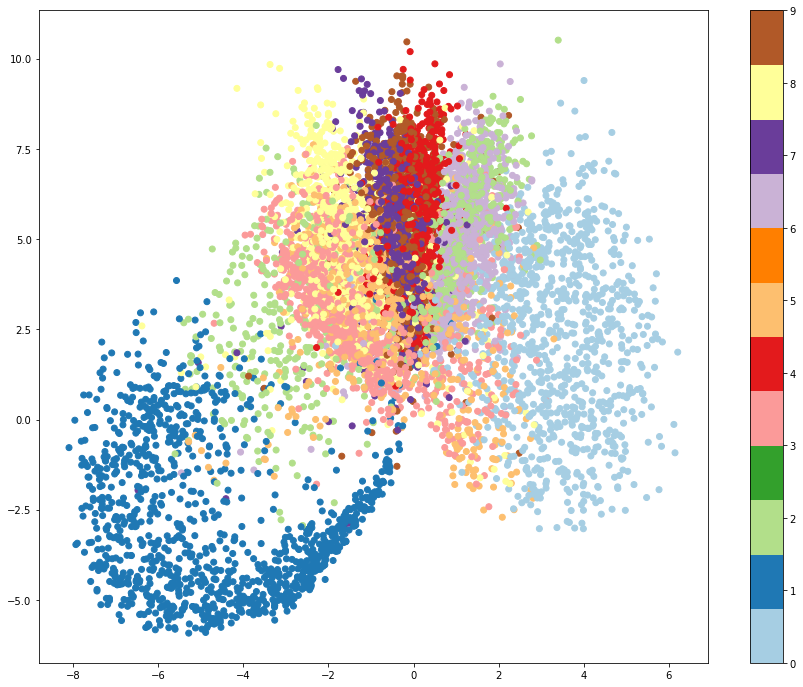

In [ ]:
# 인코더 결과값 군집확인
plt.figure(figsize=(15, 12))
plt.scatter(x=encoder_pre_result[:, 0], y=encoder_pre_result[:,1], c=y_test, cmap=plt.get_cmap('Paired'))
plt.colorbar()